### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Inserting Dataset

In [3]:
data=pd.read_csv("churn_prediction_simple.csv")

data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

#### Step1: Basic Preprocessing of Data

In [5]:
#separating Target variable

X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [6]:
#scaling of Dataset

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(X)

In [7]:
# splitting The Dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(scaled_x,Y,test_size=0.2,stratify=Y)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

### Step 2: Model Building and Prediction

##### Decision Tree Classifier Model

In [8]:
from sklearn.tree import DecisionTreeClassifier as DTC

classifier=DTC(class_weight='balanced')
classifier=DTC()

In [9]:
classifier.fit(X_train,Y_train)

predicted_values=classifier.predict(X_train)

In [10]:
predicted_values[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Step 3: Finding out Performance of Decision Tree

##### Evaluating Metrics

In [11]:
# for training set

from sklearn.metrics import classification_report

print(classification_report(Y_train,predicted_values))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [12]:
# for test set

predict_value=classifier.predict(X_test)

print(classification_report(Y_test,predict_value))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3559
           1       0.42      0.44      0.43       855

    accuracy                           0.77      4414
   macro avg       0.64      0.65      0.64      4414
weighted avg       0.78      0.77      0.78      4414



### Visualising decision Tree

In [13]:

# to install Graphviz for Decision Tree Visualisation

 #  ! pip install graphviz

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(decision_tree=classifier,
                out_file='tree_viz',
                max_depth=None,
                feature_names=X.columns,
                label=None,
                impurity=False)

In [15]:
# to diplay Image


# from graphviz import render

# render(filepath='tree_viz', format='png',engine='neato')

### Hyperparameter Tuning

In [16]:
classifier=DTC()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [1]:
# fparameters of DecisionTreeClassifier


"""DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,
                       criterion='gini',max_depth=None,
                       max_features=None,max_leaf_nodes=None,
                       min_impurity_decrease=0.0,min_impurity_split=None,
                       min_samples_leaf=1,min_samples_split=2,
                       min_weight_fraction_leaf=0.0,presort='deprecated'
                       random_state=None,splitter='best'

                       )"""

"DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,\n                       criterion='gini',max_depth=None,\n                       max_features=None,max_leaf_nodes=None,\n                       min_impurity_decrease=0.0,min_impurity_split=None,\n                       min_samples_leaf=1,min_samples_split=2,\n                       min_weight_fraction_leaf=0.0,presort='deprecated'\n                       random_state=None,splitter='best'\n\n                       )"

### Max_Depth

In [18]:
from sklearn.metrics import f1_score

def cal_score(model,x1,y1,x2,y2):
    model.fit(x1,y1)

    predict=model.predict(x1)
    f1=f1_score(y1,predict)

    predict=model.predict(x2)

    f2=f1_score(y2,predict)

    return f1,f2





In [19]:
def effect(train_Score,test_Score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=100)
    plt.plot(x_axis,train_Score,color='red',label='Train Score')
    plt.plot(x_axis,test_Score,color='black',label='Test Score')
    plt.title(title)
    plt.xlabel("parameter_value")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.show()



In [20]:
maxdepth=[ i for i in range(1,50)]
train=[]
test=[]


for i in maxdepth:
    model=DTC(class_weight='balanced',random_state=42,max_depth=i)

    f1,f2=cal_score(model,X_train,Y_train,X_test,Y_test)
    train.append(f1)
    test.append(f2)

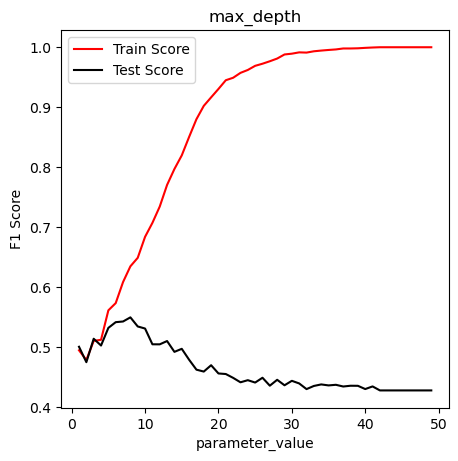

In [21]:
effect(train,test,range(1,50),'max_depth')

### Minimum_sample_Split

In [22]:
min_Samples=[i for i in range(2,5000,25)]
train=[]
test=[]

for i in min_Samples:
    model=DTC(class_weight='balanced',random_state=42,min_samples_split=i)

    f1,f2=cal_score(model,X_train,Y_train,X_test,Y_test)
    train.append(f1)
    test.append(f2)

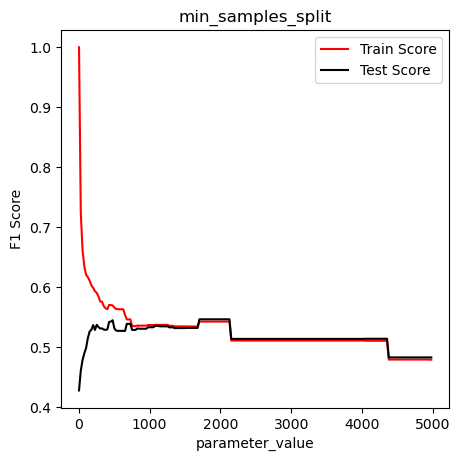

In [23]:
effect(train,test,range(2,5000,25),'min_samples_split')

### max_leaf_nodes

In [24]:
maxleafs=[i for i in range(2,200,10)]

train=[]
test=[]

for i in maxleafs:
    model=DTC(class_weight='balanced',random_state=42,max_leaf_nodes=i)

    f1,f2=cal_score(model,X_train,Y_train,X_test,Y_test)
    train.append(f1)
    test.append(f2)

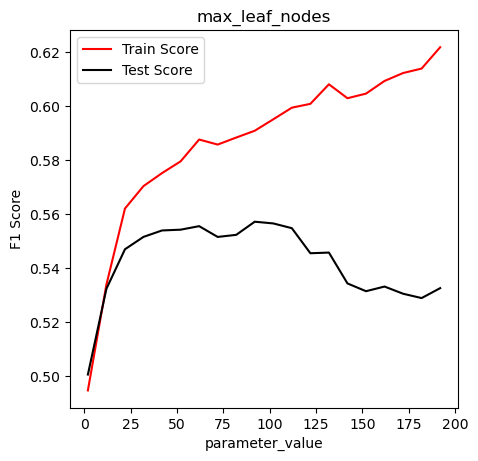

In [25]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

### min_Sample_leaf

In [26]:
minleafs=[i for i in range(2,4000,25)]

train=[]
test=[]

for i in minleafs:
    model=DTC(class_weight='balanced',random_state=42,min_samples_leaf=i)

    f1,f2=cal_score(model,X_train,Y_train,X_test,Y_test)
    train.append(f1)
    test.append(f2)

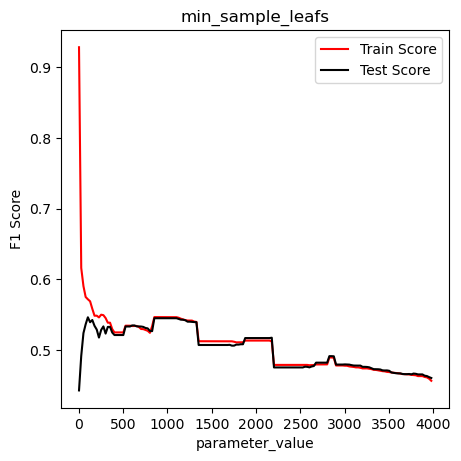

In [27]:
effect(train,test,range(2,4000,25),'min_sample_leafs')

## Feature Importances


In [28]:
model=DTC(max_depth=9)
model.fit(X_train,Y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'Feature Importance ')

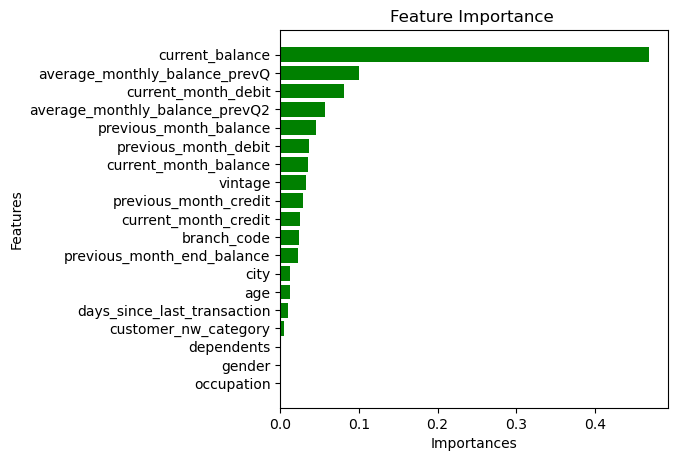

In [29]:
plt.figure(figsize=(5,5),dpi=100)
plt.barh(k.index,k,color='green')
plt.xlabel("Importances")
plt.ylabel("Features")
plt.title("Feature Importance ")